In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
%matplotlib inline

In [54]:
all_data = pd.read_csv('./Tsmc_split.csv')
all_data['log_ret'] = np.log(all_data['Close']/ all_data['Close'].shift(1))
scaler = MinMaxScaler(feature_range = (0, 1))
target_data = scaler.fit_transform(all_data.iloc[: 724, 3].values.reshape(-1, 1)).reshape(-1, )
train_x = []
train_y = []
wavelet_transform_x = []
for i in range(30, target_data.shape[0]):
    x = target_data[i - 30: i]
    y = target_data[i]
    (ca, cd) = pywt.dwt(x, 'db4')
    caT = pywt.threshold(ca, np.std(ca), mode = 'soft')
    cdT = pywt.threshold(cd, np.std(cd), mode = 'soft')
    tx = pywt.idwt(caT, cdT, 'db4')
    train_x.append(x)
    wavelet_transform_x.append(tx)
    train_y.append(y)
train_x = np.array(train_x)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
wavelet_transform_x = np.array(wavelet_transform_x)
wavelet_transform_x = wavelet_transform_x.reshape(wavelet_transform_x.shape[0], wavelet_transform_x.shape[1], 1)
train_y = np.array(train_y)

In [74]:
wavelet_transform_test_x.shape

(246, 30, 1)

In [73]:
target_data = scaler.transform(all_data.iloc[724: 1000, 3].values.reshape(-1, 1)).reshape(-1, )
test_x = []
test_y = []
wavelet_transform_test_x = []
for i in range(30, target_data.shape[0]):
    x = target_data[i - 30: i]
    y = target_data[i]
    (ca, cd) = pywt.dwt(x, 'db4')
    caT = pywt.threshold(ca, np.std(ca), mode = 'soft')
    cdT = pywt.threshold(cd, np.std(cd), mode = 'soft')
    tx = pywt.idwt(caT, cdT, 'db4')
    test_x.append(x)
    wavelet_transform_test_x.append(tx)
    test_y.append(y)
test_x = np.array(test_x)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)
wavelet_transform_test_x = np.array(wavelet_transform_test_x)
wavelet_transform_test_x = wavelet_transform_test_x.reshape(wavelet_transform_test_x.shape[0], wavelet_transform_test_x.shape[1], 1)
test_y = np.array(test_y)


In [56]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(train_x, train_y, epochs = 25, batch_size = 32)
predict_y = model.predict(test_x)

Epoch 1/25
22/22 [==============================] - 4s 29ms/step - loss: 0.0597
Epoch 2/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0121
Epoch 3/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0090
Epoch 4/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0076
Epoch 5/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0071
Epoch 6/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0084
Epoch 7/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0082
Epoch 8/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0067
Epoch 9/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0068
Epoch 10/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0068
Epoch 11/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0066
Epoch 12/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0070
Epoch 13/25
22/22 [==================

Text(0.5, 1.0, 'Original data')

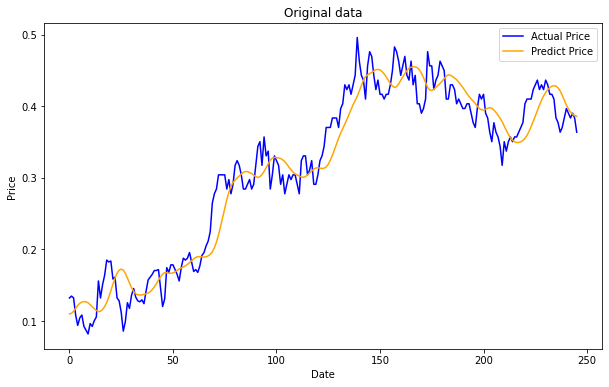

In [64]:
plt.figure(figsize = (10, 6))
plt.plot(test_y, color = 'blue', label = 'Actual Price')
plt.plot(predict_y, color = 'orange', label = 'Predict Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'upper right')
plt.title('Original data')

Text(0.5, 1.0, 'Original data')

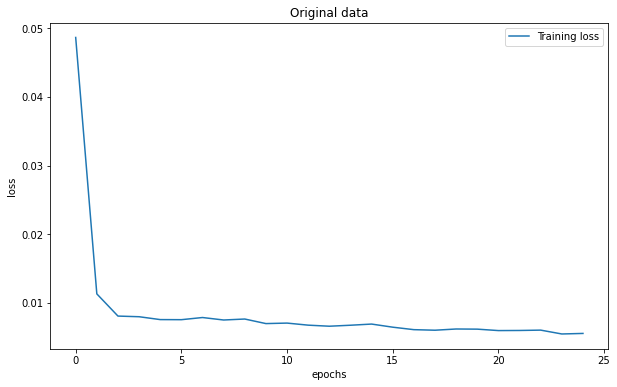

In [79]:
epochs = range(len(history.history['loss']))
plt.figure(figsize = (10, 6))
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.title('Original data')

In [75]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(wavelet_transform_x, train_y, epochs = 25, batch_size = 32)
predict_y = model.predict(wavelet_transform_test_x)

Epoch 1/25
22/22 [==============================] - 5s 31ms/step - loss: 0.0487
Epoch 2/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0113
Epoch 3/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0081
Epoch 4/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0080
Epoch 5/25
22/22 [==============================] - 1s 27ms/step - loss: 0.0075
Epoch 6/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0075
Epoch 7/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0078
Epoch 8/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0075
Epoch 9/25
22/22 [==============================] - 1s 26ms/step - loss: 0.0076
Epoch 10/25
22/22 [==============================] - 1s 28ms/step - loss: 0.0070
Epoch 11/25
22/22 [==============================] - 1s 31ms/step - loss: 0.0070
Epoch 12/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0067
Epoch 13/25
22/22 [==================

Text(0.5, 1.0, 'Original data')

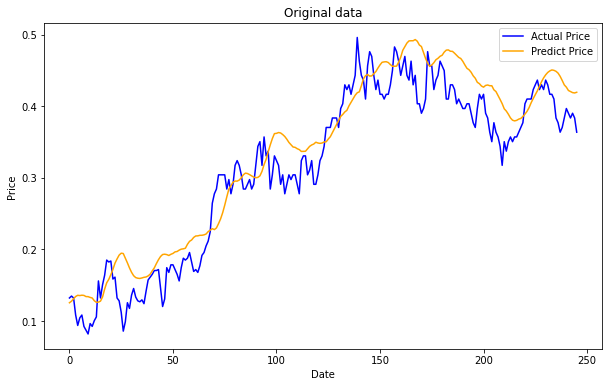

In [76]:
plt.figure(figsize = (10, 6))
plt.plot(test_y, color = 'blue', label = 'Actual Price')
plt.plot(predict_y, color = 'orange', label = 'Predict Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'upper right')
plt.title('Wavelet Transform data')

Text(0.5, 1.0, 'Wavelet Transform data')

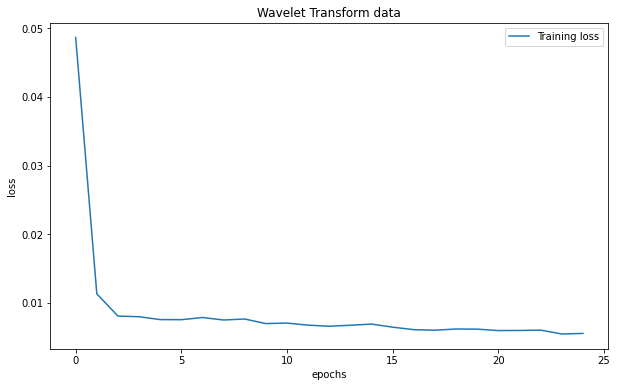

In [78]:
epochs = range(len(history.history['loss']))
plt.figure(figsize = (10, 6))
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.title('Wavelet Transform data')